In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [6]:
path1='/content/drive/MyDrive/Dementia Dataset/Normal'
path2='/content/drive/MyDrive/Dementia Dataset/Dementia'
files1=os.listdir(path1)
files2=os.listdir(path2)
Num_files_N=len(files1)
Num_files_D=len(files2)
dataset_len=Num_files_N+Num_files_D

In [7]:
name=path1+'/'+files1[0]
img=cv.imread(name)
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs_r=cv.resize(img_gs,(100,100))

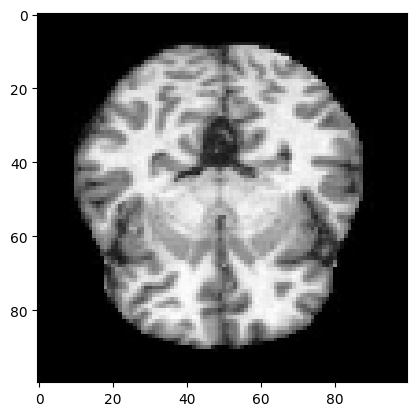

In [8]:
plt.imshow(img_gs_r,cmap='gray')

In [9]:
data=np.zeros((dataset_len,100,100,1))
label=[]
data.shape

(200, 100, 100, 1)

In [10]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i,:,:]=img_gs
    label.append('Normal')

In [11]:
for i in range(Num_files_D):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Dementia')

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [ ]:
label

In [14]:
lab


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [15]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.2, random_state=1)


In [16]:
train_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1])

In [18]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))


Train Dataset Size: 160
Test Dataset Size: 40


In [19]:
np.unique(test_labels,return_counts=True)


(array([0, 1]), array([17, 23]))

In [20]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(7,7),activation='relu'))
network.add(layers.Conv2D(32,(3,3),activation='relu'))
network.add(layers.MaxPooling2D((3,3)))

In [21]:
network.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
Total params: 119,200
Trainable params: 119,200
Non-trai

In [22]:
network.add(layers.Flatten())
network.add(layers.Dense(80,activation='relu'))
network.add(layers.Dense(50,activation='relu'))
network.add(layers.Dense(2,activation='softmax'))

In [23]:
network.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0

In [24]:
network.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [25]:
trained_network=network.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))


Epoch 1/5
5/5 [==============================] - 12s 2s/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6947 - val_accuracy: 0.4250
Epoch 2/5
5/5 [==============================] - 7s 1s/step - loss: 0.6919 - accuracy: 0.5188 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.6908 - accuracy: 0.5875 - val_loss: 0.6916 - val_accuracy: 0.4500
Epoch 4/5
5/5 [==============================] - 8s 2s/step - loss: 0.6886 - accuracy: 0.5750 - val_loss: 0.6902 - val_accuracy: 0.5750
Epoch 5/5
5/5 [==============================] - 9s 2s/step - loss: 0.6863 - accuracy: 0.6500 - val_loss: 0.6912 - val_accuracy: 0.4250


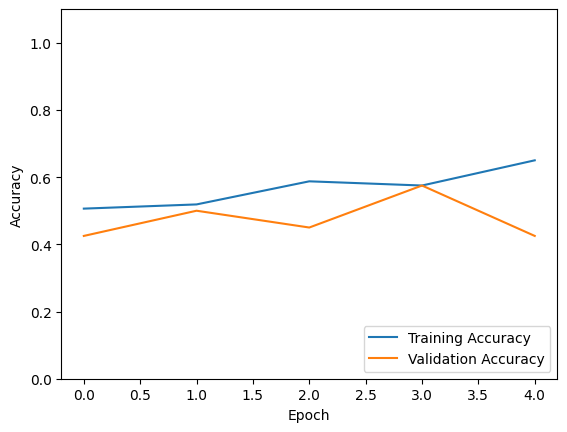

In [26]:
plt.plot(trained_network.history['accuracy'],label='Training Accuracy')
plt.plot(trained_network.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

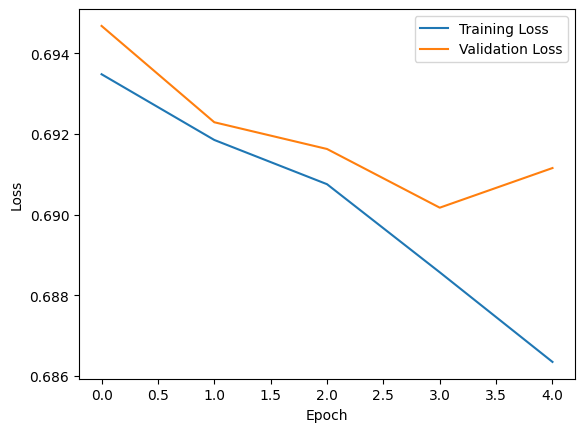

In [27]:
plt.plot(trained_network.history['loss'],label='Training Loss')
plt.plot(trained_network.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [29]:
test_loss,test_acc=network.evaluate(test_images,test_labels)


2/2 [==============================] - 0s 91ms/step - loss: 0.6912 - accuracy: 0.4250


In [30]:
y_predict=network.predict(test_images)


2/2 [==============================] - 1s 145ms/step


In [31]:
y_predict


array([[0.5161459 , 0.4838541 ],
       [0.5162978 , 0.48370212],
       [0.5048964 , 0.49510348],
       [0.52432746, 0.47567248],
       [0.5102666 , 0.4897334 ],
       [0.51801205, 0.4819879 ],
       [0.50625694, 0.49374303],
       [0.51123714, 0.48876277],
       [0.5123547 , 0.48764533],
       [0.5179136 , 0.48208636],
       [0.5187497 , 0.48125026],
       [0.51006895, 0.4899309 ],
       [0.51342934, 0.48657072],
       [0.5168906 , 0.48310947],
       [0.5142427 , 0.48575732],
       [0.5196631 , 0.48033696],
       [0.5187382 , 0.48126176],
       [0.5135032 , 0.48649678],
       [0.516505  , 0.483495  ],
       [0.50366896, 0.49633104],
       [0.51289517, 0.48710483],
       [0.51076376, 0.4892363 ],
       [0.50531775, 0.4946821 ],
       [0.5096858 , 0.4903142 ],
       [0.51171285, 0.48828718],
       [0.514942  , 0.48505804],
       [0.50260836, 0.49739158],
       [0.515464  , 0.48453602],
       [0.52088594, 0.47911406],
       [0.5030566 , 0.49694332],
       [0.

In [32]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [33]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
print(metrics.confusion_matrix(test_labels,y_pred))


[[17  0]
 [23  0]]


In [35]:
print(metrics.accuracy_score(test_labels,y_pred))

0.425
